# Análise da Desigualdade Social em Aspectos Diversos
Autor: Henrique Eduardo

## 1 — Introdução
A desigualdade social mostra-se, cada vez mais, um problema de proporções globais, a ser combatido pela sociedade. Ela é responsável por privar uma quantidade obscena de pessoas a situações degradantes e, frequentemente, perigosas. A má distribuição de recursos exclui bilhões do acesso à água potável, a uma moradia digna, ao bem-estar social e psicológico, segurança etc. Sua erradicação envolve, ao menos, seis dos objetivos de desenvolvimento do milênio, da ONU; logo, é de se esperar um estudo sério da situação por parte dos agentes globais. 
<br>A presente análise almeja a visualizar o problema e toda a extensão de sua complexidade; deseja-se inferir relações entre os diversos fatores e, desse modo, obter um panorama claro de como o problema da desigualdade está estruturado e como ele afeta populações. Como método, usaremos um modelo de hipóteses e testes. Para cada dado haverá uma suposição lógica a ser verificada em seguida. Por exemplo: "será que o gênero correlaciona-se à renda? [...] do gráfico, nota-se que há sim forte correlação entre gênero e salário".

## O Data Set
A coleção de dados de nossa análise é de um senso realizado nos EUA, o qual analisa diversos aspectos de cada indivíduo, tais como etnia, gênero, salário, ocupação etc. Como a coleta ocorreu durante um período longo, há um volume massivo de dados — mais de 47.000 linhas. Isso permite-nos um estudo detalhado da situação.

In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [103]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
47980,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
47981,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
47982,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
47983,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
47984,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Os dados são dos seguintes tipos:

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47985 non-null  int64 
 1   workclass        47985 non-null  object
 2   fnlwgt           47985 non-null  int64 
 3   education        47985 non-null  object
 4   educational-num  47985 non-null  int64 
 5   marital-status   47985 non-null  object
 6   occupation       47985 non-null  object
 7   relationship     47985 non-null  object
 8   race             47985 non-null  object
 9   gender           47985 non-null  object
 10  capital-gain     47985 non-null  int64 
 11  capital-loss     47985 non-null  int64 
 12  hours-per-week   47985 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [105]:
num_individuos = 0
for i in range (0, 47985):
    num_individuos += df['fnlwgt'][i]
print ("temos:", num_individuos, "indivíduos")

temos: 9097667642 indivíduos


## 2 — Análise de Dados Contínuos

Aqui, vamos analisar as features numéricas, sobretudo idade, anos dedicados à educação, jornada de trabalho semanal, e renda.

## 2.1 — Idade e Gênero
Hipóteses: no gênero, observa-se relativa igualdade em relação à quantidade de indivíduos, com uma quantidade de homens levemente menor nas idades mais avançadas, devido a uma taxa maior de mortalidade.

número de homens: 6137786269
número de mulheres: 2959881373


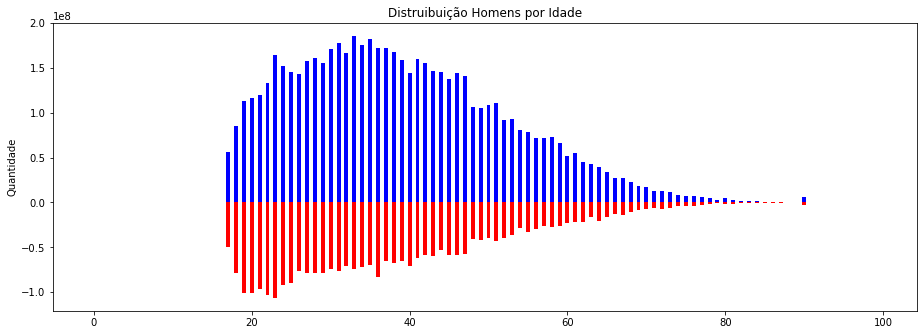

In [106]:
male_age = []
female_age = []
male_num = 0
female_num = 0

#inicializa os vetores
for i in range (0,100):
    male_age.append(0)
    female_age.append(0)
    
#Registra quantidade de pessoas em cada idade
for i in range(0,47985):
    if df['gender'][i] == "Male":
        male_age[df['age'][i]] += df['fnlwgt'][i]
        male_num += df['fnlwgt'][i]
    if df['gender'][i] == "Female":
        female_age[df['age'][i]] -= df['fnlwgt'][i]
        female_num += df['fnlwgt'][i]

X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Homens por Idade')
ax.bar(X, male_age, color = 'b', width = 0.5)
ax.bar(X, female_age, color = 'r', width = 0.5)

print("número de homens:", male_num)
print("número de mulheres:", female_num)


De imediato, notamos que a quantidade de homens e mulheres na amostra é muito discrepante. Uma é quase o triplo do outra. Assim, para cada análise sobre gênero, devemos considerar um certo fator de correção, para garantir que os índices sejam proporcionais e comparáveis. Os gráficos mostram parcilmente a hipótese da mortalidade maior aos homens. Nota-se, proporcionalmente, percentual maior de mulheres na parte mais jovem do gráfico, de 18 a 34 anos, aproximadamente. Em seguida, o declínio da quantidade de indivíduos é maior para os homens, mas por uma diferença sutil, não tão acentuada tal como esperado. Algo relevante é a falta de pessoas com idade menor que 17 anos. Assim, o que ocorre na juventude pode passar invisível nessa análise.

## 2.2 — Idade e Etnia
Hipóteses: a quantidade de indivíduos brancos será muito maior que a quantidade de indivíduos negros, por conta de essa ser a realidade etnica presente nos EUA. Além disso, notará-se mortalidade muito maior em negros e não brancos. A quantidade de pessoas brancas e negras será substancialmente maior que a de indígenas, asiáticos e outros.

brancos: 7695375237
negros: 1051124085


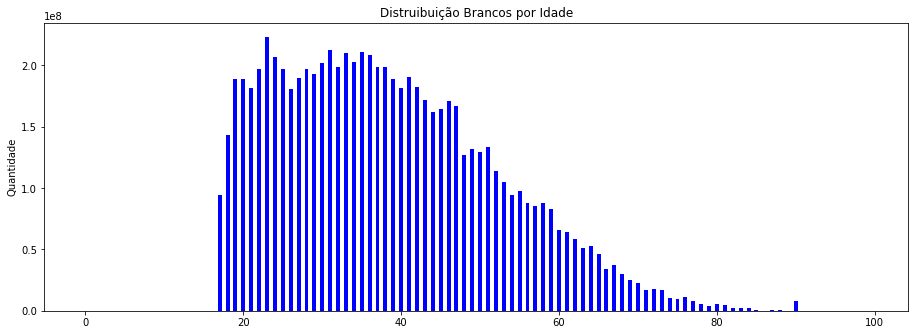

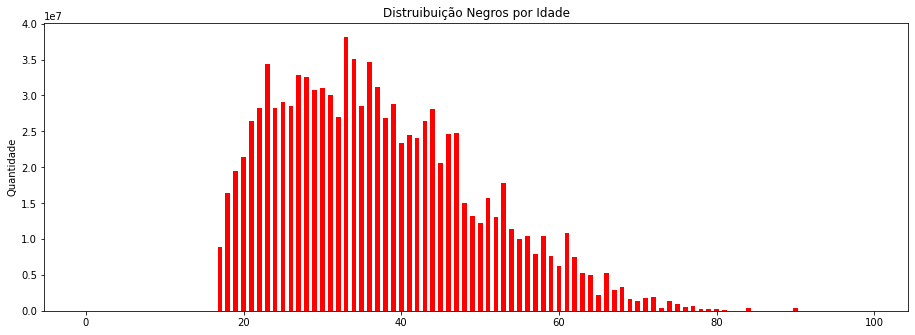

In [107]:
white_age = []
black_age = []
white_num = 0
black_num = 0

#inicializa os vetores
for i in range (0,100):
    white_age.append(0)
    black_age.append(0)

#Registra quantidade de pessoas em cada idade
for i in range(0,47985):
    if df['race'][i] == "White":
        white_age[df['age'][i]] += df['fnlwgt'][i]
        white_num += df['fnlwgt'][i]
    if df['race'][i] == "Black":
        black_age[df['age'][i]] += df['fnlwgt'][i]
        black_num += df['fnlwgt'][i]
        
X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Brancos por Idade')
ax.bar(X, white_age, color = 'b', width = 0.5)

X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Negros por Idade')
ax.bar(X, black_age, color = 'r', width = 0.6)

print ("brancos:", white_num)
print ("negros:", black_num)

Nossa hipótese foi confirmada. A mortalidade de pessoas negras é maior que a de pessoas brancas — o declínio da curva é mais acentuado após o pico, para negros. Percebe-se muito ruido na amostra; certas descontinuidades e saltos abruptos. Isso pode ser resultado da longa duração da coleta que, por perdurar durante tantas décadas, pode reunir realidades muito distintas numa mesma amostra. Vamos quantificar essas diferenças:

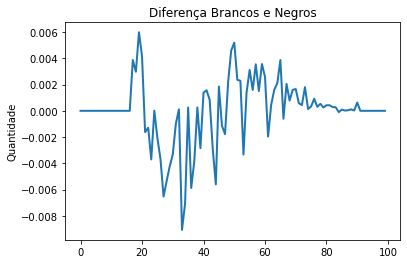

In [108]:
race_gap_age = []

for i in range (0, 100):
    race_gap_age.append((white_age[i]/white_num) - (black_age[i]/black_num))

x = np.arange(100)
fig, ax = plt.subplots()
ax.set_ylabel('Quantidade')
ax.set_title('Diferença Brancos e Negros')
ax.plot(x, race_gap_age, linewidth=2.0)
plt.show()



Aqui, multiplicamos as quantidades de pessoas por fatores de proporcionalidade que pudessem tornar possível a comparação das amostras, como se possuíssemos 100 brancos e 100 negros como espaço amostral original. Ainda sim, mesmo com a correção de proporcionalidade, nota-se grande desigualdade da quantidade de indivíduos. Isso indica que a mortalidade negra é maior, de modo consistente. Pode-se explicar o comportamento pelas condições precárias e insalubres a que esses indivíduos, em virtude de um problema racial profundo que encontra expressão particularmente agressiva nos EUA, estão submetidos.

Vamos agora analisar a distribuição de idades dos outros povos:

indígenas:  56452163
asiáticos: 219617453
outras etnias: 75098704


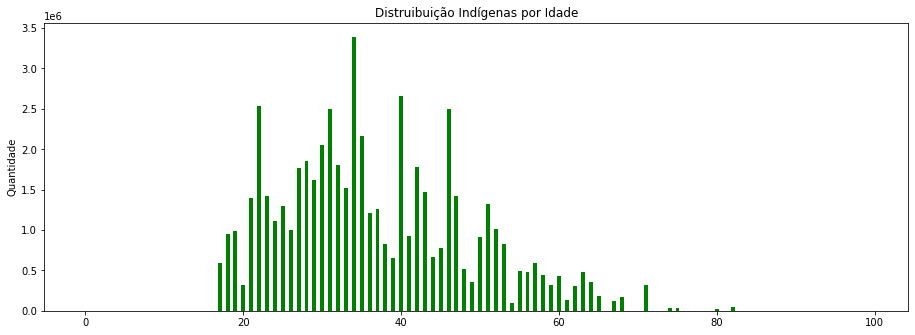

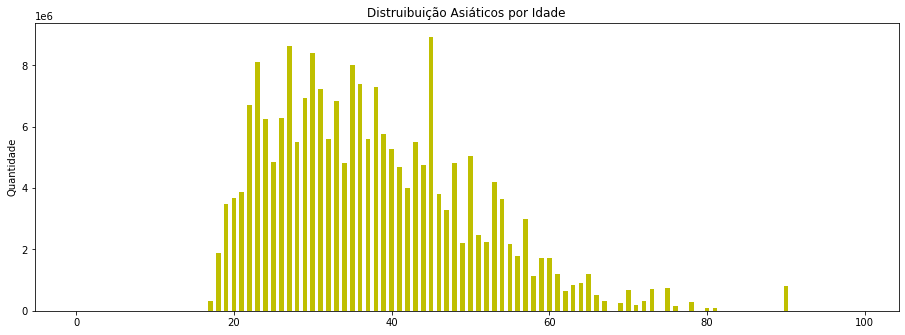

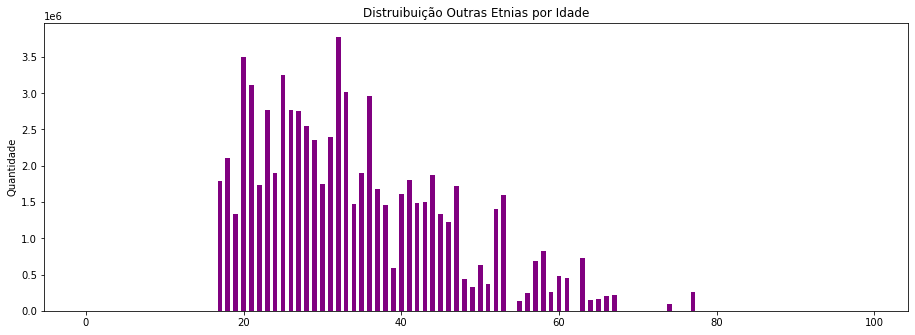

In [109]:
indian_age = []
asian_age = []
other_age = []
indian_num = 0
asian_num = 0
other_num = 0

#inicializa os vetores
for i in range (0,100):
    indian_age.append(0)
    asian_age.append(0)
    other_age.append(0)

#Registra quantidade de pessoas em cada idade
for i in range(0,47985):
    if df['race'][i] == "Asian-Pac-Islander":
        asian_age[df['age'][i]] += df['fnlwgt'][i]
        asian_num += df['fnlwgt'][i]
    if df['race'][i] == "Amer-Indian-Eskimo":
        indian_age[df['age'][i]] += df['fnlwgt'][i]
        indian_num += df['fnlwgt'][i]
    if df['race'][i] == "Other":
        other_age[df['age'][i]] += df['fnlwgt'][i]
        other_num += df['fnlwgt'][i]
        
X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Indígenas por Idade')
ax.bar(X, indian_age, color = 'g', width = 0.5)

X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Asiáticos por Idade')
ax.bar(X, asian_age, color = 'y', width = 0.6)

X = np.arange(100)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Distruibuição Outras Etnias por Idade')
ax.bar(X, other_age, color = 'purple', width = 0.6)

print ("indígenas: ", indian_num)
print ("asiáticos:", asian_num)
print ("outras etnias:", other_num)

Como esperado, a quantidade de dessas populações não brancas nem negras compoem parte muito menor, em número, da sociedade americana. Essas distribuições, assim como nas da análise anterior, apresentam variações muito bruscas e muitos outliers, o que dificulta a análise de padrões. Talvez, esse ruído estatístico advenha também fato de a duração da coleta ser tão longa, pela adição de amostras muito heterogêneas a nossa coleção de dados. Uma separação por décadas, por exemplo, ajudaria a obtenção de dados mais suaves nas em todas as análises e, portanto, um estudo mais completo.

Por fim, vamos analisar o perfil etnico da amostra:

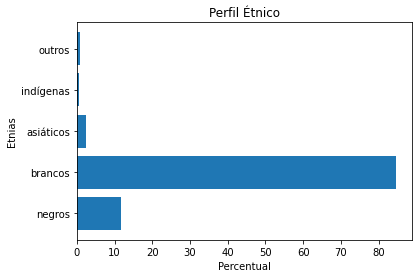

In [110]:
total_num = white_num + black_num + asian_num + other_num + indian_num;

plt.barh(['negros', 'brancos', 'asiáticos', 'indígenas', 'outros'],[black_num*100/total_num, 
         white_num*100/total_num, 
         asian_num*100/total_num, 
         indian_num*100/total_num,
         other_num*100/total_num])
plt.title('Perfil Étnico')
plt.ylabel('Etnias')
plt.xlabel('Percentual')
plt.show()

Nota-se predominância branca extremamente desproporcional na amostra. Essa distribuição está de acordo com as hipóteses levantadas; a quantidade de asiáticos, indígenas e outras etnias é muito pequena em relação às duas predominantes, a branca e a negra. Parte disso pode surgir do próprio perfil etnico estadunidense, sabidamente muito branco. Mas, outra parte pode surgir também de uma coleta problemática, assim como ocorrera com as mulheres — não existe, de imedediato, um motivo para explicar a discrepância.

## 2.3 — Ganho e Perda Capital versus Idade
Hipóteses: A população mais jovem praticamente não terá ganho capital; a mais velha, por sua vez, terá.

<BarContainer object of 100 artists>

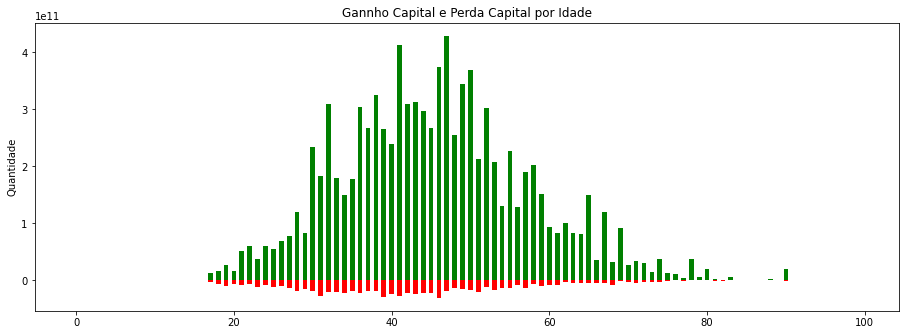

In [111]:
capital_gain_age = []
capital_loss_age = []

for i in range (0,100):
    capital_gain_age.append(0)
    capital_loss_age.append(0)

for i in range (0,47985):
    capital_gain_age[df['age'][i]] += df['capital-gain'][i]*df['fnlwgt'][i]
    capital_loss_age[df['age'][i]] -= df['capital-loss'][i]*df['fnlwgt'][i]

#print (capital_gain_age)

X = np.arange(100)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_ylabel('Quantidade')
ax.set_title('Gannho Capital e Perda Capital por Idade')
ax.bar(X, capital_gain_age, color = 'g', width = 0.6)
ax.bar(X, capital_loss_age, color = 'r', width = 0.6)



De fato, o ganho capital concentra-se numa idade de 30 a 60 anos. Como investimentos demandam dinheiro, o público mais jovem, por possuir pouco tempo no mercado e remuneração baixa, acaba excluído dessa categoria. Além disso, o capital-loss mostra-se quase 10 vezes menor que o capital-gain. Isso pode ser explicado pelo comportamento de desistir de um investimento nos primeiros sinais de perda. O medo de comprometer suas economias acaba por remover essas pessoas do ramo de investimentos; como consequência, sobram, quase que exclusivamente, os investidores bem sucedidos em suas ações.

## 2.4 — Ganho Capital versus Educação
Hipóteses: há forte correlação entre ganho capital e a quantidade de anos dispendida na formação educacional; há uma separação muito brusca, em que existe um grupo extremamente rico e muito distante do resto da amostra.

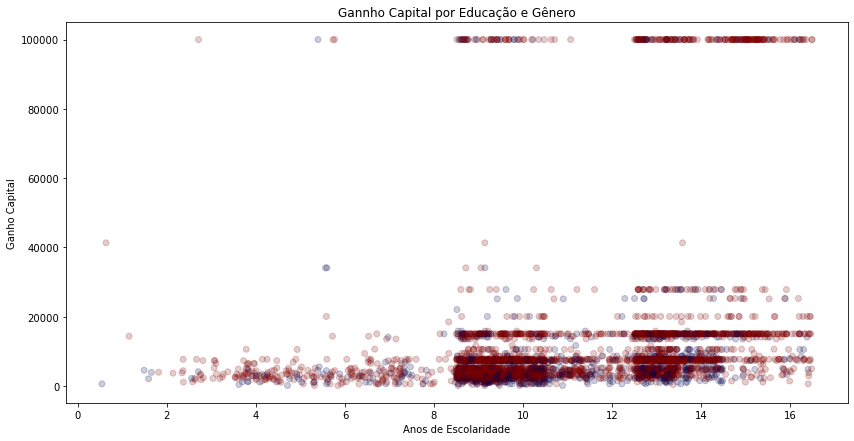

In [112]:
np.random.seed(19680801)

edu_num_cap_gain = [[],[],[]]
hori_noise = []


for i in range (0,47985):
    if df['capital-gain'][i] != 0:
        edu_num_cap_gain[0].append(df['educational-num'][i] + (np.random.random_sample()- 0.5))
        edu_num_cap_gain[1].append(df['capital-gain'][i])
        if df['gender'][i] == "Female":
            edu_num_cap_gain[2].append(0)
        else:
            edu_num_cap_gain[2].append(1)
        
plt.figure(figsize=(14,7)) 
plt.title('Gannho Capital por Educação e Gênero')
plt.xlabel('Anos de Escolaridade')
plt.ylabel('Ganho Capital')
plt.scatter(edu_num_cap_gain[0], edu_num_cap_gain[1], c = edu_num_cap_gain[2], cmap = 'seismic', alpha=0.2)
plt.show()

Verifica-se em partes a hipótese da correlação entre escolaridade e ganho capital. A maior parte das pessoas com bom ganho de capital dedicou-se mais de 8 anos em sua educação formal. Isso faz sentido; podemos assumir que tiveram formação escolar completa. No entanto, a partir dos 8 anos de estudo, o aumento do ganho de capital não parece crescer proporcionalmente. A hipótese da separação estava correta; o grupo extremamente rico afasta-se da amostra de maneira muito brusca de desproporcional, confirmando a desigualdade. Nessa população tão abastada, há duas regiões de destaque: de 8 a 12 anos e mais de 12 anos de estudo. Quem pertence à segunda região, provavelmente formou-se no ensino superior e, por isso, obteve renda tão boa.

## 2.5 — Ganho Capital e Profissão
Hipóteses: haverá poucas profissões com ganho capital muito alto e muitas com baixo; homens predominam.

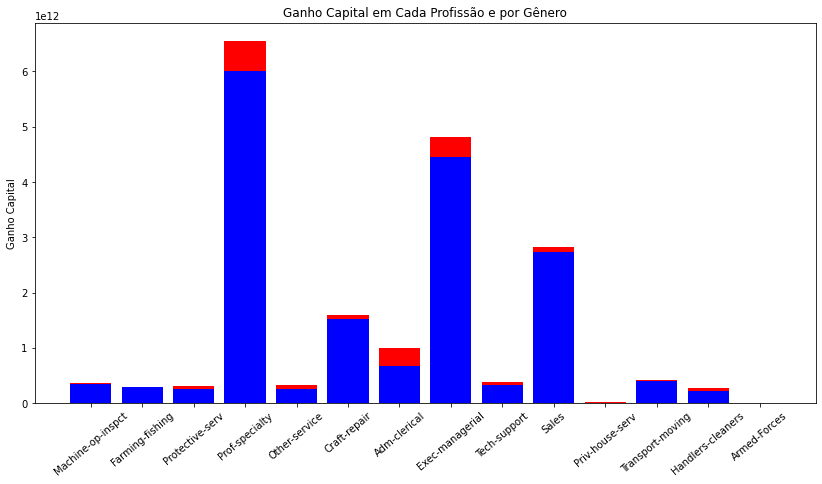

In [113]:
def occup_index(n):
    if n == "Machine-op-inspct":
        return 0
    if n == "Farming-fishing":
        return 1
    if n == "Protective-serv":
        return 2
    if n == "Prof-specialty":
        return 3
    if n == "Other-service":
        return 4
    if n == "Craft-repair":
        return 5
    if n == "Adm-clerical":
        return 6
    if n == "Exec-managerial":
        return 7
    if n == "Tech-support":
        return 8
    if n == "Sales":
        return 9
    if n == "Priv-house-serv":
        return 10
    if n == "Transport-moving":
        return 11
    if n == "Handlers-cleaners":
        return 12
    if n == "Armed-Forces":
        return 13
    return 0
    


occup_num = [[],[],[],[]]

occup_num[0] = ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 
 'Other-service', 'Craft-repair', 'Adm-clerical', 
 'Exec-managerial', 'Tech-support', 'Sales', 
 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 
 'Armed-Forces']

#47985

for i in range (0, 14):
    occup_num[0].append(occup_index(i))
    occup_num[1].append(0)
    occup_num[2].append(0)
    occup_num[3].append(0)

for i in range (0,47985):
    occup_num[1][occup_index(df['occupation'][i])] += df['capital-gain'][i] *df['fnlwgt'][i]
    if df['gender'][i] == "Male":
        occup_num[1][occup_index(df['occupation'][i])] += df['capital-gain'][i] *df['fnlwgt'][i]
    if df['gender'][i] == "Female":
        occup_num[2][occup_index(df['occupation'][i])] += df['capital-gain'][i] *df['fnlwgt'][i]

x = ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 
 'Other-service', 'Craft-repair', 'Adm-clerical', 
 'Exec-managerial', 'Tech-support', 'Sales', 
 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 
 'Armed-Forces']

for i in range (0, 14):
    occup_num[3][i] = occup_num[2][i] / occup_num[1][i]
  
# plot bars in stack manner
plt.figure(figsize=(14,7)) 
plt.ylabel('Ganho Capital')
plt.xticks(rotation=40)
plt.title("Ganho Capital em Cada Profissão e por Gênero")
plt.bar(x, occup_num[1], color='b')
plt.bar(x, occup_num[2], bottom=occup_num[1], color='r')
plt.show()
    
    



Como esperado, o ganho capital de homens é desproporcionalmente maior que a de mulheres, mesmo considerando que, na amostra, eles componham o triplo em quantidade. Isso já aponta para forte desigualdade de gênero quanto a remuneração. Sobre a distribuição do ganho capital nas profissões, percebemos predominância de três grupos — "Prof-speciality", "Exec-managerial" e "Sales" —, enquanto os outros ficam relativamente nivelados. 

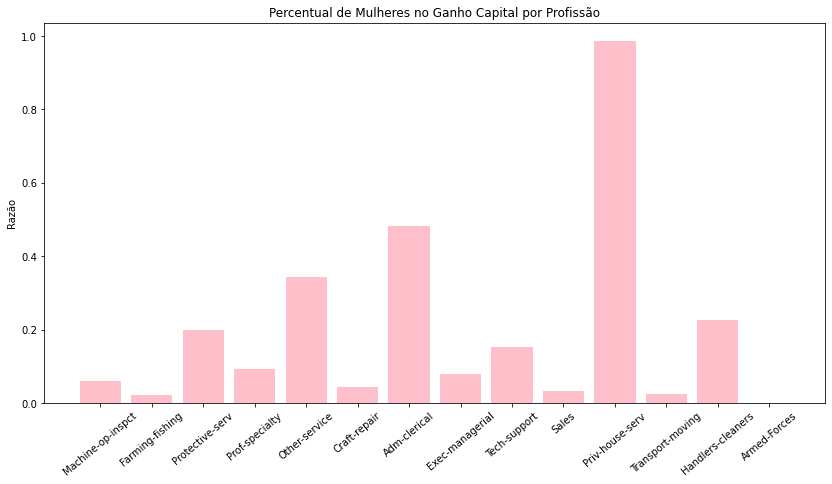

In [114]:
plt.figure(figsize=(14,7)) 
plt.ylabel('Razão')
plt.xticks(rotation=40)
plt.title("Percentual de Mulheres no Ganho Capital por Profissão")
plt.bar(x, occup_num[3], color='pink')
plt.show()
    

Aqui, percebemos que as mulheres estão em maior quantidade especificamente nas áreas menos bem pagas e fisicamente mais degradantes, enquanto sua participação nas categorias mais ricas é muito reduzida e pouco expressiva.

## 3 — Análise de Dados Categóricos

## 3.1 — Status Civil versus Etnia

Hipóteses: como o público jovem foi excluído da pesquisa, espera-se grande quantidade de pessoas casadas e de divórcios.

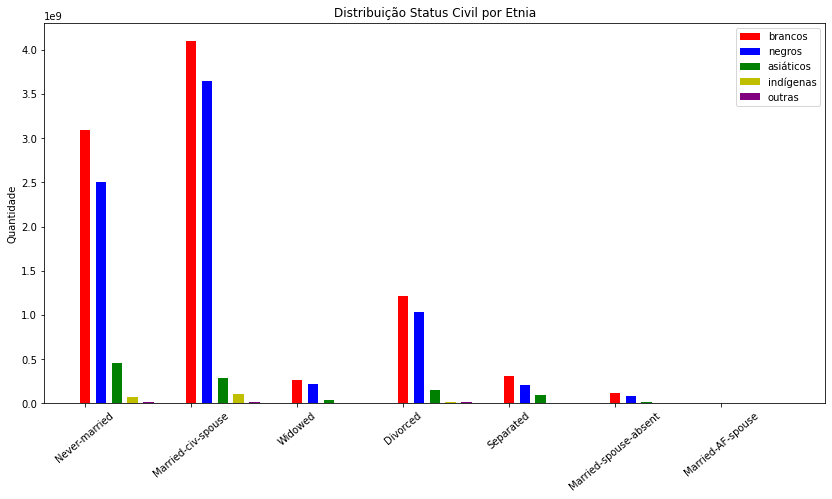

In [115]:

['Never-married', 'Married-civ-spouse', 'Married-civ-spouse', 'Widowed', 
 'Divorced', 'Separated', 'Separated', 'Married-spouse-absent', 'Married-spouse-absent', 
 'Married-AF-spouse', 'Married-AF-spouse']

def marital_index(n):
    if n == "Never-married":
        return 0
    if n == "Married-civ-spouse":
        return 1
    if n == "Widowed":
        return 2
    if n == "Divorced":
        return 3
    if n == "Separated":
        return 4
    if n == "Married-spouse-absent":
        return 5
    if n == "Married-AF-spouse":
        return 6
    return 0

marital_num = [[],[],[],[],[],[],[],[],[],[]]

marital_num[0] = ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced','Separated', 
                  'Married-spouse-absent', 'Married-AF-spouse']

for i in range (0, 7):
    marital_num[1].append(0)
    marital_num[2].append(0) #brancos
    marital_num[3].append(0) #negros
    marital_num[4].append(0) #asiáticos
    marital_num[5].append(0) #indígenas
    marital_num[6].append(0) #outras etnias
    marital_num[7].append(0) #Ganho Capital
    marital_num[8].append(0) #Perda Capital
    marital_num[9].append(0) #Income


for i in range (0, 47985):
    marital_num[1][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    if df['race'][i] == "White":
        marital_num[2][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    if df['race'][i] == "Black":
        marital_num[3][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    if df['race'][i] == "Asian-Pac-Islander":
        marital_num[4][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    if df['race'][i] == "Amer-Indian-Eskimo":
        marital_num[5][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    if df['race'][i] == "Other":
        marital_num[6][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    
    marital_num[7][marital_index(df['marital-status'][i])] += df['capital-gain'][i]
    marital_num[8][marital_index(df['marital-status'][i])] -= df['capital-loss'][i]
    
    if df['income'][i] == ">50K":
        marital_num[9][marital_index(df['marital-status'][i])] += df['fnlwgt'][i]
    

X = np.arange(7)

plt.figure(figsize=(14,7)) 
plt.title("Distribuição Status Civil por Etnia")
plt.ylabel('Quantidade')
plt.xticks(rotation=40)
plt.bar(marital_num[0], marital_num[1], 0.1 ,color='r', label = "brancos")
plt.bar(X + 0.15, marital_num[2], 0.1 ,color='b', label = "negros")
plt.bar(X + 0.30, marital_num[3], 0.1 ,color='g', label = "asiáticos")
plt.bar(X + 0.45, marital_num[4], 0.1 ,color='y', label = "indígenas")
plt.bar(X + 0.60, marital_num[5], 0.1 ,color='purple', label = "outras")
plt.legend(loc="upper right")
plt.show()



De fato, há forte presença de casados; a quantidade gigantesca de pessoas nunca casadas foi surpreendente, pois esperava-se que não fosse tão maior que a quantidade de divorciados. As proporções das etnias mantêm-se aproximadamentes iguais em todas as categorias de status civil.

## 3.2 — Ganho Capital e Status Civil

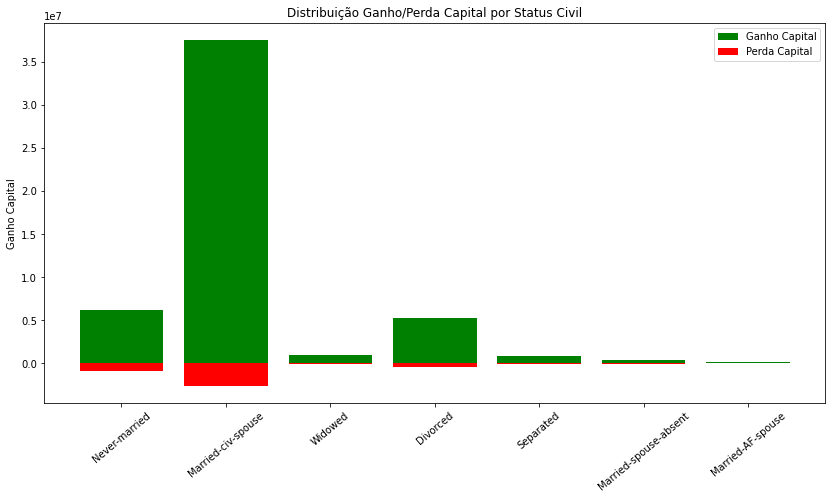

In [116]:
plt.figure(figsize=(14,7)) 
plt.title("Distribuição Ganho/Perda Capital por Status Civil")
plt.ylabel('Ganho Capital')
plt.xticks(rotation=40)
plt.bar(marital_num[0], marital_num[7], 0.8 ,color='g', label = "Ganho Capital")
plt.bar(marital_num[0], marital_num[8], 0.8 ,color='r', label = "Perda Capital")
plt.legend(loc="upper right")
plt.show()

Aqui, vemos clara predominância de casados com maior ganho capital. Os nunca casados surgem logo em seguida; por fim, os divorciados e os demais. Nota-se clara discrepância entre casados e as outras categorias. A perda capital mantém certa proporção aproximadamente constante com o ganho, qualquer que seja a categoria. Conclui-se, então, que existe forte correlação de status civil e ganho capital.

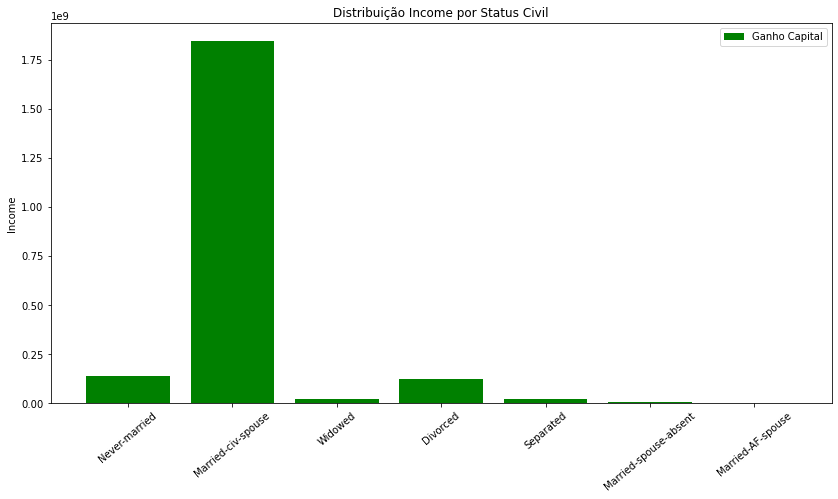

In [117]:
plt.figure(figsize=(14,7)) 
plt.title("Distribuição Income por Status Civil")
plt.ylabel('Income')
plt.xticks(rotation=40)
plt.bar(marital_num[0], marital_num[9], 0.8 ,color='g', label = "Ganho Capital")
plt.legend(loc="upper right")
plt.show()

No income, percebemos exatamente a mesma tendência observada no gráfico anterior.

## 3.3 — Income e Educação
Hipóteses: uma renda alta surgirá sobretudo na população com grau de bacharelado, doutor ou mestre; a distância entre graduados e não graduados será brutal. Poucos são os graduados, em relação aos demais.

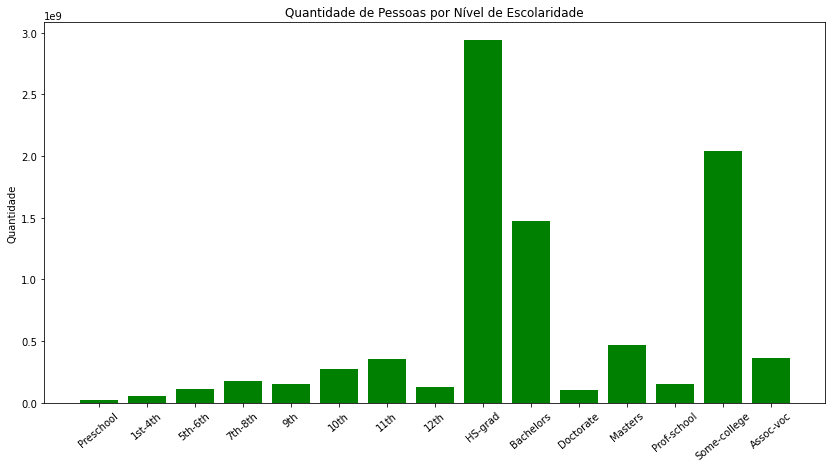

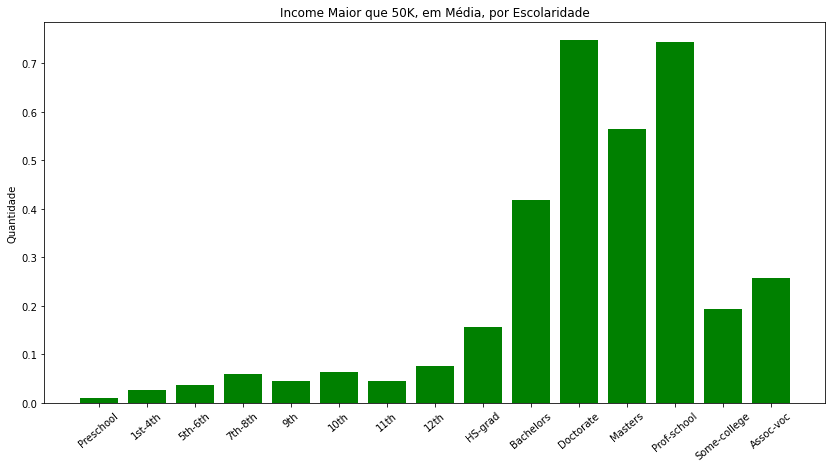

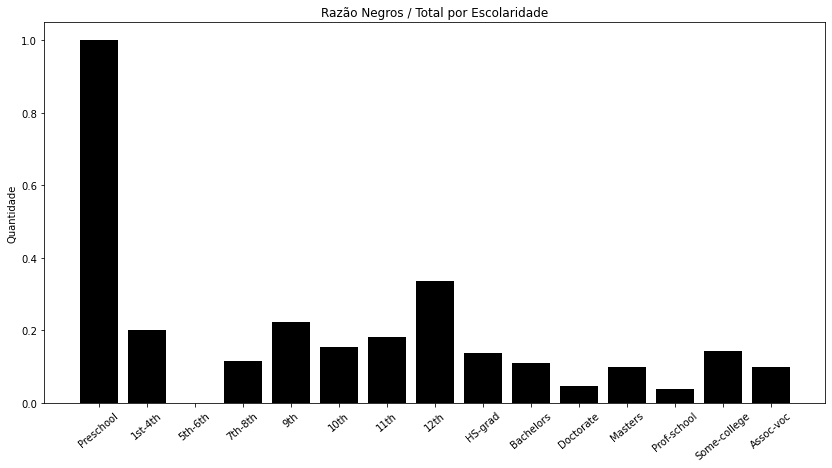

In [118]:
#print(elementos(df['education']))

educ_num = [[], [], [], [], [], []]

educ_num[0] = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
               'HS-grad', 'Bachelors', 'Doctorate', 'Masters', 'Prof-school', 'Some-college', 'Assoc-voc']

for i in range (0, 15):
    educ_num[1].append(0) #quantidade
    educ_num[2].append(0) #quantos ganham acima de 50K
    educ_num[3].append(0) #brancos acima de 50K
    educ_num[4].append(0) #negros acima de 50K
    educ_num[5].append(0) #relação negros/brancos acima de 50K

for i in range (0, 47985):
    for j in range (0, 15):
        if df['education'][i] == educ_num[0][j]:
            educ_num[1][j] += df['fnlwgt'][i]
            educ_num[2][j] += df['fnlwgt'][i] * (df['income'][i] == ">50K")
            educ_num[3][j] += df['fnlwgt'][i] * (df['income'][i] == ">50K") * (df['race'][i] == "White")
            educ_num[4][j] += df['fnlwgt'][i] * (df['income'][i] == ">50K") * (df['race'][i] == "Black")
            educ_num[4][j] += df['fnlwgt'][i] * (df['income'][i] == ">50K") * (df['race'][i] == "Black")
            
for i in range (0, 15):
    educ_num[2][i] = educ_num[2][i]/educ_num[1][i]
    educ_num[3][i] = educ_num[3][i]/educ_num[1][i]
    educ_num[4][i] = educ_num[4][i]/educ_num[1][i]
    educ_num[5][i] = educ_num[4][i]/(educ_num[3][i] + educ_num[4][i])

plt.figure(figsize=(14,7)) 
plt.title("Quantidade de Pessoas por Nível de Escolaridade")
plt.ylabel('Quantidade')
plt.xticks(rotation=40)
plt.bar(educ_num[0], educ_num[1], 0.8 , color='g')
plt.show()

plt.figure(figsize=(14,7)) 
plt.title("Income Maior que 50K, em Média, por Escolaridade")
plt.ylabel('Quantidade')
plt.xticks(rotation=40)
plt.bar(educ_num[0], educ_num[2], 0.8 , color='g')
plt.show()

plt.figure(figsize=(14,7)) 
plt.title("Razão Negros / Total por Escolaridade")
plt.ylabel('Quantidade')
plt.xticks(rotation=40)
plt.bar(educ_num[0], educ_num[5], 0.8 , color='black')
plt.show()
        

Aqui, vemos que o nível de escolaridade acima de graduação possui o maior income, apesar de graduados, mestres, doutores etc., ainda constituirem parcela muito pequena da população, como pode ser visto no gráfico anterior. A diferença entre bacharéis e formados apenas no ensino médio é muito abrupta. A razão entre brancos e negros em cada área do ensino também evidencia fortemente a desigualdade racial. Na pre-escola, não havia nenhum branco, o que deixa-nos com razão 100% para essa categoria; além disso, a quantidade de negros nos graus universitários é menor que a proporção esperada, de aproximadamente 2 para 15.

# 4 — Conclusões

Da presente análise de dados, pode-se depreender uma série de inferências importantes a respeito da desigualdade social, em seus aspectos de gênero, etnia e educação.
A distribuição de pessoas na amostra é muito assimétrica em gênero. A quantidade de homens é quase o triplo da quantidade de mulheres. Isso prejudica a qualidade das análises de gênero, pois torna mais difícil a tarefa de comparar índices em públicos numericamente tão distintos. Pode-se assumir, por exemplo, que, em virtude dessa diferença, possivelmente a coleta ocorrera em certa parcela da população, por exemplo, a mais rica; nessa hipótese, as mulheres das classes mais baixas não são representadas em nossos dados, fato responsável por comprometer a intenção original do estudo: obter uma análise global a partir da local, tomando esta como representativa do todo. Logo, as conclusões a seguir devem ser observadas à luz desse defeito.
Dos gráficos, nota-se clara desigualdade com relação a gênero e boa parte dos índices coletados. Quanto à distribuição etária, existe uma mortalidade mais para homens, proporcionalmente, conforme o avanço da idade — especialistas culpam o cuidade menor com a saúde por parte do público masculino como responsável por tal diferença. Na idade mais jovem, as mulheres parecem possuir presença mais forte; não consegui, a partir apenas dos dados, obter razão clara para isso; parte pode ser devido a defeitos já mencionados da amostra, mas outra explicação possível poderia ser encontrada nas estatísitcas relacionadas a mortalidade. Elas, além de poderem esclarecer o fato, poderiam fornecer matéria de análise para outras manifestações da desigualdade de gênero, como homicídios, sobretudo contra mulheres, e violência.
<br> Quanto à renda e ao ganho capital, nota-se forte predominância de homens entre os mais ricos, mesmo proporcionalmente. O ganho capital distribui-se em favor do público masculino. As profissões mais bem pagas contam sempre com alto percentual de homens, enquanto as menos bem pagas ficam mais com as mulheres. Se a amostra fosse mais representativa, talvez o abismo pudesse ser ainda maior, com a diferença de gênero ainda mais marcante e explícita.
Para a desigualdade social, de forma geral, A análise mais evidente possível seria expor os ganhos e os patrimônios de toda a amostra, dividida em percentis: quanto ganham os 50% mais pobres em comparação ao 3% mais ricos? No entanto, esse estudo tão capital é impossibilitado pela falta de dados numéricos desse tipo na coleta. Mas, do que já se possui, extrai-se um quadro muito bom da desigualdade social: a riqueza dos mais ricos é obscenamente maior que a dos mais pobres. No gráfico de 2.4, "Ganho Capital versus Educação", há uma faixa horizontal muito larga que separa a população comum dos extremamente ricos. Nela, não há praticamente ser algum, nenhum outlier; ou seja, existe um abismo gigantesco entre essas duas classes sociais.
Certos índices podem determinar muito bem a que classe pertence um indivíduo em particular; a educação, por exemplo, permite estimar que uma pessoa não graduada está, muito provavelmente, nas classes baixa ou média, em comparação com os graduados, mestres e doutores. As pessoas sem educação acima da graduação, em geral, são muito desfavorecidas.
O perfil étnico da amostra contava especialmente com brancos e negros, mas com predominância destes primeiros — quase 90% da população total. Dessa forma, analises mais completas sobre a etnia em relação a padrões de renda e educação são parcialmente comprometidos. Da distribuição em torno da escolaridade, vê-se razão menor de negros em graus universitários, nos quais está concentrada a parcela mais rica da sociedade. Dessa forma, a desigualdade racial é deduzida a partir da análise de nossa amostra.
Tudo aponta para uma sociedade extremamente desigual e, de certa forma, previsível: estudado o padrão segundo o qual ela está organizada, já se pode depreender em quais índices haverá predominância ou deficiência de mulheres, negros, indígenas etc. Se partirmos do mero conhecimento do passado em que a população negra era literalmente separada por muros, as mulheres eram proibidas de obterem graus de bacharéu, indígenas eram exterminados por genocidas colonizadores etc., já se pode inferir as tendências observadas em nossa análise. Surpresa: foi exatamente o que fiz. As hipóteses apresentadas a cada seção surgiram — a exceção daquelas geradas por pura curiosidade — do conhecimento histórico-social já consolidado pela academia. Para minha surpresa, elas estavam muito acuradas e explícitas nos gráficos.